In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [272]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
df =pd.read_csv("C:/Users/User/Documents/DSTI - PYTHON/ML project/books.csv", index_col = 'bookID')
df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.;;;
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.;;;
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic;;;
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.;;;
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic;;;
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512.0,156.0,20.0,12/21/2004,Da Capo Press;;;
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9.780140e+12,eng,635.0,783.0,56.0,12/1/1988,Penguin Books;;;
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415.0,820.0,95.0,8/1/1993,Penguin Books;;;


In [3]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher;;;'],
      dtype='object')

In [8]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher;;;          0
dtype: int64

In [9]:
df.duplicated().any()

False

In [78]:
df=df.dropna()

In [10]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11098.000000,1.109800e+04,11098.000000,1.109800e+04,11098.00000
mean,3.934580,9.759833e+12,336.514777,1.798103e+04,543.10975
std,0.348448,4.434734e+11,241.288321,1.126229e+05,2579.41135
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.00000
25%,3.770000,9.780345e+12,192.000000,1.042500e+02,9.00000
50%,3.960000,9.780584e+12,299.000000,7.480000e+02,47.00000
75%,4.140000,9.780872e+12,416.000000,5.016750e+03,238.00000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.00000


In [11]:
df[df.ratings_count == 0].head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
bookID,,,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,8408064762,9.788408e+12,spa,480.0,0.0,0.0,5/1/2006,Geoplaneta;;;
799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,1740592050,9.781741e+12,eng,295.0,0.0,0.0,9/1/2001,Lonely Planet;;;
1302,Juiced Official Strategy Guide,Doug Walsh,0.00,0744005612,9.780744e+12,eng,112.0,0.0,0.0,6/1/2005,BradyGames;;;
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,0321317106,9.780321e+12,eng,664.0,0.0,0.0,3/11/2005,Longman Publishing Group;;;
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,0321365208,9.780321e+12,eng,854.0,0.0,0.0,7/29/2005,Longman Publishing Group;;;


In [12]:
df['isbn']

bookID
1        0439785960
2        0439358078
4        0439554896
5        043965548X
8        0439682584
            ...    
45631    1560254416
45633    0140110879
45634    0140131965
45639    0060878827
45641    8497646983
Name: isbn, Length: 11098, dtype: object

In [73]:
df['isbn13']

bookID
1        9780439785969
2        9780439358071
4        9780439554893
5        9780439655484
8        9780439682589
             ...      
45631    9781560254416
45633    9780140110876
45634    9780140131963
45639    9780060878825
45641    9788497646987
Name: isbn13, Length: 11019, dtype: object

In [72]:
df['language_code'].unique().tolist()

['eng',
 'fre',
 'spa',
 'mul',
 'grc',
 'ger',
 'jpn',
 'ara',
 'nl',
 'zho',
 'lat',
 'por',
 'ita',
 'rus',
 'msa',
 'glg',
 'wel',
 'swe',
 'nor',
 'tur',
 'gla',
 'ale']

In [15]:
type(df['publication_date'][1])

str

In [16]:
df['publication_date']

bookID
1         9/16/2006
2          9/1/2004
4         11/1/2003
5          5/1/2004
8         9/13/2004
            ...    
45631    12/21/2004
45633     12/1/1988
45634      8/1/1993
45639     2/27/2007
45641     5/28/2006
Name: publication_date, Length: 11098, dtype: object

In [71]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'year'],
      dtype='object')

In [18]:
df.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
df['num_pages']

bookID
1         652
2         870
4         352
5         435
8        2690
         ... 
45631     512
45633     635
45634     415
45639     434
45641     272
Name: num_pages, Length: 11098, dtype: int64

In [21]:
df['num_pages'] = df['num_pages'].astype(np.int64)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
type(df['isbn13'][1])

str

In [25]:
df['isbn13'] = df['isbn13'].astype(str)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df['isbn13']

bookID
1        9780439785969
2        9780439358071
4        9780439554893
5        9780439655484
8        9780439682589
             ...      
45631    9781560254416
45633    9780140110876
45634    9780140131963
45639    9780060878825
45641    9788497646987
Name: isbn13, Length: 11098, dtype: object

In [28]:
df['isbn13'] = df['isbn13'].replace(r'\.0$', '', regex=True)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
df['ratings_count']

bookID
1        2095690
2        2153167
4           6333
5        2339585
8          41428
          ...   
45631        156
45633        783
45634        820
45639        769
45641        113
Name: ratings_count, Length: 11017, dtype: int32

In [207]:
df['text_reviews_count']

bookID
1        27591
2        29221
4          244
5        36325
8          164
         ...  
45631       20
45633       56
45634       95
45639      139
45641       12
Name: text_reviews_count, Length: 11017, dtype: int32

In [37]:
df = df.drop(df[(df.ratings_count == 0)].index)

In [201]:
df['ratings_count'] = df['ratings_count'].astype(int)

In [205]:
df['text_reviews_count'] = df['text_reviews_count'].astype(int)

In [206]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,year
count,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000
mean,3.943384,336.825996,1.811226e+04,547.075701,2000.193701
std,0.295015,241.091033,1.130257e+05,2588.459323,8.206445
min,1.000000,0.000000,1.000000e+00,0.000000,1900.000000
25%,3.780000,194.000000,1.100000e+02,9.000000,1998.000000
50%,3.960000,300.000000,7.670000e+02,48.000000,2003.000000
75%,4.140000,416.000000,5.073000e+03,242.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


In [44]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [40]:
df.rename(columns = {'publisher;;;':'publisher'}, inplace = True)

In [41]:
df['publisher'] = df['publisher'].str.replace(';;;', '')

In [42]:
df['publisher'].isna().sum()

0

In [43]:
df['publisher']

bookID
1        Scholastic Inc.
2        Scholastic Inc.
4             Scholastic
5        Scholastic Inc.
8             Scholastic
              ...       
45631      Da Capo Press
45633      Penguin Books
45634      Penguin Books
45639               Ecco
45641      Edimat Libros
Name: publisher, Length: 11019, dtype: object

In [123]:
df['language_code'].unique().tolist()

['eng',
 'fre',
 'spa',
 'mul',
 'grc',
 'ger',
 'jpn',
 'ara',
 'nl',
 'zho',
 'lat',
 'por',
 'ita',
 'rus',
 'msa',
 'glg',
 'wel',
 'swe',
 'nor',
 'tur',
 'gla',
 'ale']

In [48]:
df[df['language_code'] == 'en-US']

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


In [47]:
for i in df.index :
    if df.loc[i, 'language_code'] == 'en-US' or df.loc[i, 'language_code'] == 'en-GB' or df.loc[i, 'language_code'] == 'en-CA' or df.loc[i, 'language_code'] == 'enm': 
        df.loc[i, 'language_code'] = 'eng'

In [69]:
df['publication_date'].isna().index

Index(['1', '2', '4', '5', '8', '10', '12', '13', '14', '16',
       ...
       '45617', '45623', '45625', '45626', '45630', '45631', '45633', '45634',
       '45639', '45641'],
      dtype='object', name='bookID', length=11019)

In [62]:
type(df['publication_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [80]:
df['publication_date'].isna().sum()

0

In [64]:
df['publication_date'][1]

Timestamp('2004-09-01 00:00:00')

In [60]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')

In [70]:
df['year'] = pd.DatetimeIndex(df['publication_date']).year

In [121]:
type(df['year'][1])

numpy.int32

In [120]:
df['year'] = df['year'].astype(int)

# Data visualization

What's the count of book per language ?

In [122]:
df_by_lan = pd.DataFrame({'count' : df.groupby('language_code').size()})

In [124]:
dic_language = {"ale" : "Aleut" ,
                "ara" : "Arabic",
                "eng" : "English",
               "fre" : "French", 
               "ger" : "German",
               "gla" : "Galeic" , 
               "glg" : "Galician",
               "grc" : "Greec", 
               "ita" : "Italian",
               "jpn" : "Japanese", 
               "lat" : "Latin",
               "msa" : "Malay",
               "mul" : "Multilingual",
               "nl" : "Dutch",
               "nor" : "Norwegian",
               "por" : "Portugese",
               "rus" : "Russian",
               "spa" : "Spanish", 
               "swe" : "Sweden",
               "tur" : "Turkish", 
               "wel" : "Welsh", 
               "zho" : "Chinese"}

In [129]:
for code in df_by_lan.index : 
    df_by_lan.loc[code, "language"] = dic_language[code] 

In [130]:
df_by_lan.describe()

,count
count,22.000000
mean,500.772727
std,2223.292131
min,1.000000
25%,1.000000
50%,2.500000
75%,17.750000
max,10452.000000


In [135]:
fig = px.bar(df_by_lan, x = "language" , y = "count", text_auto='.2s', title = "Count of book by languages.")
fig.update_traces(marker_color='rgb(88, 235, 18)', marker_line_color='rgb(0, 0, 0)',
                  marker_line_width=1.5, opacity=0.7)

fig.update_layout(xaxis_title="language", yaxis_title="count")
fig.show()

What's the average rating per year ?

In [137]:
df_by_year = pd.DataFrame({"Average_rating" : df.groupby('year').average_rating.mean()})

In [140]:
fig = px.scatter(df_by_year, x = df_by_year.index, y = "Average_rating", title = "Average rating per year.",  
                 marginal_x="histogram", marginal_y="rug", trendline="lowess", trendline_color_override="black")
fig.update_layout(xaxis_title="Year", yaxis_title="Average rating")
fig.update_traces(marker_color='rgb(88, 235, 18)')
fig.show()

What's the top 3 highest rated authors who have published at least 35 books ?

In [316]:
authors = pd.DataFrame({"Count" : df.authors.value_counts()})

In [317]:
authors["Average_rating"] = df.groupby("authors").average_rating.mean() 

In [318]:
authors = authors[authors.Count > 25 ]

In [319]:
authors = authors.sort_values(by = ['Count'], ascending = True)

In [320]:
authors

,Count,Average_rating
Dick Francis,28,3.962143
Mercedes Lackey,29,4.039310
Sandra Brown,29,3.742069
Piers Anthony,30,3.716667
Agatha Christie,33,3.989091
Orson Scott Card,35,3.779143
Rumiko Takahashi,38,4.190000
Stephen King,39,3.974615
P.G. Wodehouse,40,4.147250


In [188]:
y_count = authors.Count
y_rate = authors.Average_rating
x = authors.index


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_count,
    y=x,  opacity = 0.5,
    marker=dict(
        color='rgba(193, 78, 122, 0.6)',
        line=dict(
            color='rgba(193, 78, 122, 1.0)',
            width=1),
    ),
    name='Count of book per author who have published at least 25 books.',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_rate, y=x,
    mode='lines+markers',
    line_color='rgb(168, 238, 97)',
    name='Average rating per author who have published at least 25 books.',
), 1, 2)

fig.update_layout(
    title='Count & Average rating per author',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.80],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(0, 0, 0, 0.8)',
        linewidth=2,
        domain=[0, 0.80],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.03,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

y_s = y_count 
y_nw = np.round(y_rate, decimals=2)
annotations = []

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn,
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 0, 0)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd ,
                            text=str(yd) ,
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 0, 0)'),
                            showarrow=False))


fig.update_layout(annotations=annotations)

fig.show()

# Classification

In [204]:
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591.0,2006-09-16,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221.0,2004-09-01,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244.0,2003-11-01,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325.0,2004-05-01,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164.0,2004-09-13,Scholastic,2004


In [208]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,year
count,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000
mean,3.943384,336.825996,1.811226e+04,547.075701,2000.193701
std,0.295015,241.091033,1.130257e+05,2588.459323,8.206445
min,1.000000,0.000000,1.000000e+00,0.000000,1900.000000
25%,3.780000,194.000000,1.100000e+02,9.000000,1998.000000
50%,3.960000,300.000000,7.670000e+02,48.000000,2003.000000
75%,4.140000,416.000000,5.073000e+03,242.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


In [325]:
group = []
for lines in df.index.tolist() : 
        if df.loc[lines, "average_rating"] <= 3 : 
            group.append("Less Good")
        elif df.loc[lines, "average_rating"] <= 4 and df.loc[lines, "average_rating"] >3 : 
            group.append("Good")
        else : 
            group.append("Very good")

In [326]:
df["rating_category"] = group

In [327]:
df["rating_category"].value_counts()

Good         6239
Very good    4704
Less Good      74
Name: rating_category, dtype: int64

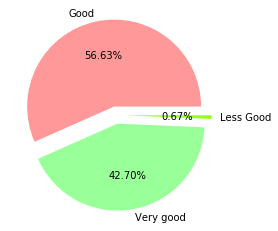

In [328]:
colors = ['#ff9999','#99ff99','#99ff19']
plt.pie(df.rating_category.value_counts(), labels=df.rating_category.value_counts().index,
        autopct='%1.2f%%',explode=[0.1,0.1,0.1], colors = colors)
plt.show()

Feature Engineering

In [237]:
df_engineered = df.copy()

In [239]:
df_engineered = df_engineered.drop(['title','authors', 'publication_date', 'publisher'], 1)

In [242]:
# Remove outliers from language code
lang_occur = pd.DataFrame({'Count' : df_engineered.language_code.value_counts()})
for language in lang_occur.index : 
    if lang_occur.loc[ language ,'Count'] < 2 :
        index = df_engineered[df_engineered.loc[:,'language_code'] == language].index
        df_engineered = df_engineered.drop(index)

In [241]:
df_engineered.head(5)

,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,year,rating_category
bookID,,,,,,,,,
1,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006,Very good
2,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004,Very good
4,4.42,0439554896,9780439554893,eng,352,6333,244,2003,Very good
5,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004,Very good
8,4.78,0439682584,9780439682589,eng,2690,41428,164,2004,Very good


In [243]:
df_engineered.head(5)

,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,year,rating_category
bookID,,,,,,,,,
1,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006,Very good
2,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004,Very good
4,4.42,0439554896,9780439554893,eng,352,6333,244,2003,Very good
5,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004,Very good
8,4.78,0439682584,9780439682589,eng,2690,41428,164,2004,Very good


In [255]:
df_engineered.language_code.value_counts()

eng    10452
spa      212
fre      139
ger       96
jpn       45
mul       19
zho       14
por       10
grc        9
ita        5
lat        3
rus        2
swe        2
Name: language_code, dtype: int64

In [253]:
# Transform each language code into a column
df_ready = pd.concat([df_engineered,pd.get_dummies(df_engineered.language_code)],axis=1).drop(columns=["language_code", 'average_rating']) 
df_ready.head(5)

,isbn,isbn13,num_pages,ratings_count,text_reviews_count,year,rating_category,eng,fre,ger,grc,ita,jpn,lat,mul,por,rus,spa,swe,zho
bookID,,,,,,,,,,,,,,,,,,,,
1,0439785960,9780439785969,652,2095690,27591,2006,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0439358078,9780439358071,870,2153167,29221,2004,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0439554896,9780439554893,352,6333,244,2003,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0
5,043965548X,9780439655484,435,2339585,36325,2004,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0439682584,9780439682589,2690,41428,164,2004,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0


# Model evaluation

In [278]:
df_train, df_test = train_test_split(df_ready, test_size = 0.15) #15%

In [279]:
#Train data
X_train = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_train = df_train.rating_category.values

#Test data
X_test = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_test = df_test.rating_category.values

In [294]:
lr_model = LogisticRegression(random_state=0,max_iter=1000, solver='liblinear')

# here we train the model on the training data
lr_model.fit(X=X_train, y=Y_train)

y_test_predicted = lr_model.predict(X_test)

# Confusion matrix
conf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good","y_test_Very good"],index=["y_pred_Less_good","y_pred_Good","y_pred_Very good"]
)

conf.loc[:,:] =  confusion_matrix(y_true= Y_test,y_pred= y_test_predicted)
conf = conf/len(Y_test)

report_RL1 =classification_report(y_true=Y_test, y_pred=y_test_predicted)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [295]:
conf

,y_test_Less_good,y_test_Good,y_test_Very good
y_pred_Less_good,0.510896,0.0,0.048426
y_pred_Good,0.006659,0.0,0.000000
y_pred_Very good,0.341404,0.0,0.092615


In [296]:
print(report_RL1)

              precision    recall  f1-score   support

        Good       0.59      0.91      0.72       924
   Less Good       0.00      0.00      0.00        11
   Very good       0.66      0.21      0.32       717

    accuracy                           0.60      1652
   macro avg       0.42      0.38      0.35      1652
weighted avg       0.62      0.60      0.54      1652

